# **INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS**

## DATA PRE-PROCESSING & FEATURE SELECTION

###  DATA PRE-PROCESSING SUMMARY

- Convert categorical to numerical
- Check outliers & Impute outliers
- Feature transformation
- Ckeck Missing Value

### FEATURE SELECTION SUMMARY:

- Drop unique & Constant Column
- Check correlation with heatmap & Remove highly correlated feature
- Check Duplicates
- Principle component analysis
- Save pre-process data.

### Importing the libraries

In [1]:
#Importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
#Loading the dataset

df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

### Viewing the data present in the dataset

In [3]:
#Checking the first 5 rows of the dataset
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
#checking the last 5 rows of the dataset
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [5]:
#checking random rows inthe dataset

df.sample(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
355,E1001642,27,Female,Medical,Married,Sales,Sales Representative,Travel_Rarely,11,3,...,2,5,4,3,1,0,0,0,No,3
428,E1001770,35,Male,Life Sciences,Married,Sales,Sales Representative,Travel_Rarely,7,1,...,1,1,3,3,1,0,0,0,No,3
406,E1001736,39,Female,Life Sciences,Single,Research & Development,Laboratory Technician,Non-Travel,2,3,...,2,11,2,4,1,0,0,0,Yes,4
1165,E100931,31,Male,Medical,Divorced,Sales,Sales Executive,Travel_Rarely,6,4,...,4,13,4,4,7,7,5,7,No,2
152,E1001280,45,Male,Life Sciences,Married,Development,Developer,Non-Travel,23,2,...,3,9,2,3,9,8,0,8,No,3
458,E1001827,33,Male,Life Sciences,Married,Research & Development,Laboratory Technician,Travel_Rarely,28,4,...,2,15,3,3,15,14,5,7,No,2
1172,E100942,48,Female,Life Sciences,Married,Development,Senior Developer,Travel_Rarely,1,4,...,1,21,3,1,3,2,0,2,No,3
1021,E100699,38,Female,Life Sciences,Married,Development,Developer,Travel_Rarely,25,2,...,3,19,2,3,10,8,0,1,No,3
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
260,E1001462,34,Male,Medical,Single,Research & Development,Healthcare Representative,Travel_Frequently,1,3,...,3,14,3,3,13,9,4,9,No,4


### Checking basic information of Dataset

In [6]:
#checking the shape of the dataset
df.shape

(1200, 28)

* We have 2 dimensional data with 1200 employee records and 28 features about the employee

In [7]:
#checking the information about the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

* We have 28 features with the integer and object datatypes in the dataset
* 19 integer or numberical datatype features
* 9 object or categorical datatype features

#### Statistical Description

In [8]:
#checking the statistical description of object datatype
df.describe(include = "O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* The dataset contains 1200 records across all columns.
* Employees come from six different educational backgrounds.
* There are six departments within the company.
* The workforce has a higher proportion of male employees.
* The company has hired a larger number of employees with a Life Sciences background.

In [9]:
#checking the statistical description of the numerical datatype
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


**Employee profile**
* The Age of the employees working in the company is between 18 to 60 and the average age of the total employees is 36.
* Average distance from home for the employees is 9.16 kms and 29 kms is the longest distance employee travels.

**Education and job level**
* The average education level of the employees is 3 in the scale of 5, shows that most of the employees are atleast a graduate.
* The average of employeejoblevel is 2.07 shows that most of the employees are the entry-level or mid-level employees.

**Satisfaction and Involvement**
* The employees environment, job, employeesrelationship satisfactions are around 2.7 - 2.8 in the scale of 4, we can find employees are more than moderately satisfied from the job.
* Job involvement of the employees is moderate as the average of empjobinvolvement is 2.
* The work-life balance has an average rating of 2.74, implying employees generally experience a fair work-life balance.

**Performance and Compensation**
* The average hourly rate is ₹65.98, ranging from ₹30 to ₹100.
* The last salary hike percentage averages 15.22%, showing a healthy increment trend.
* The performance rating has a mean of 2.95 (on a scale of 1–4), suggesting most employees are performing at or above satisfactory levels.
* Employees undergo training about 2–3 times a year on average.

In [10]:
#Checking the column names
print(df.columns)
print("\n Number of columns in the dataset are", len(df.columns))

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

 Number of columns in the dataset are 28


### Missing Values Analysis

In [11]:
#checking for missing values in the dataset

df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* We don't have any null values present in the dataset

In [12]:
#checking for the duplicate values

df.duplicated().sum()

0

* There is no duplicate values in the dataset

In [13]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### Checking for Outliers

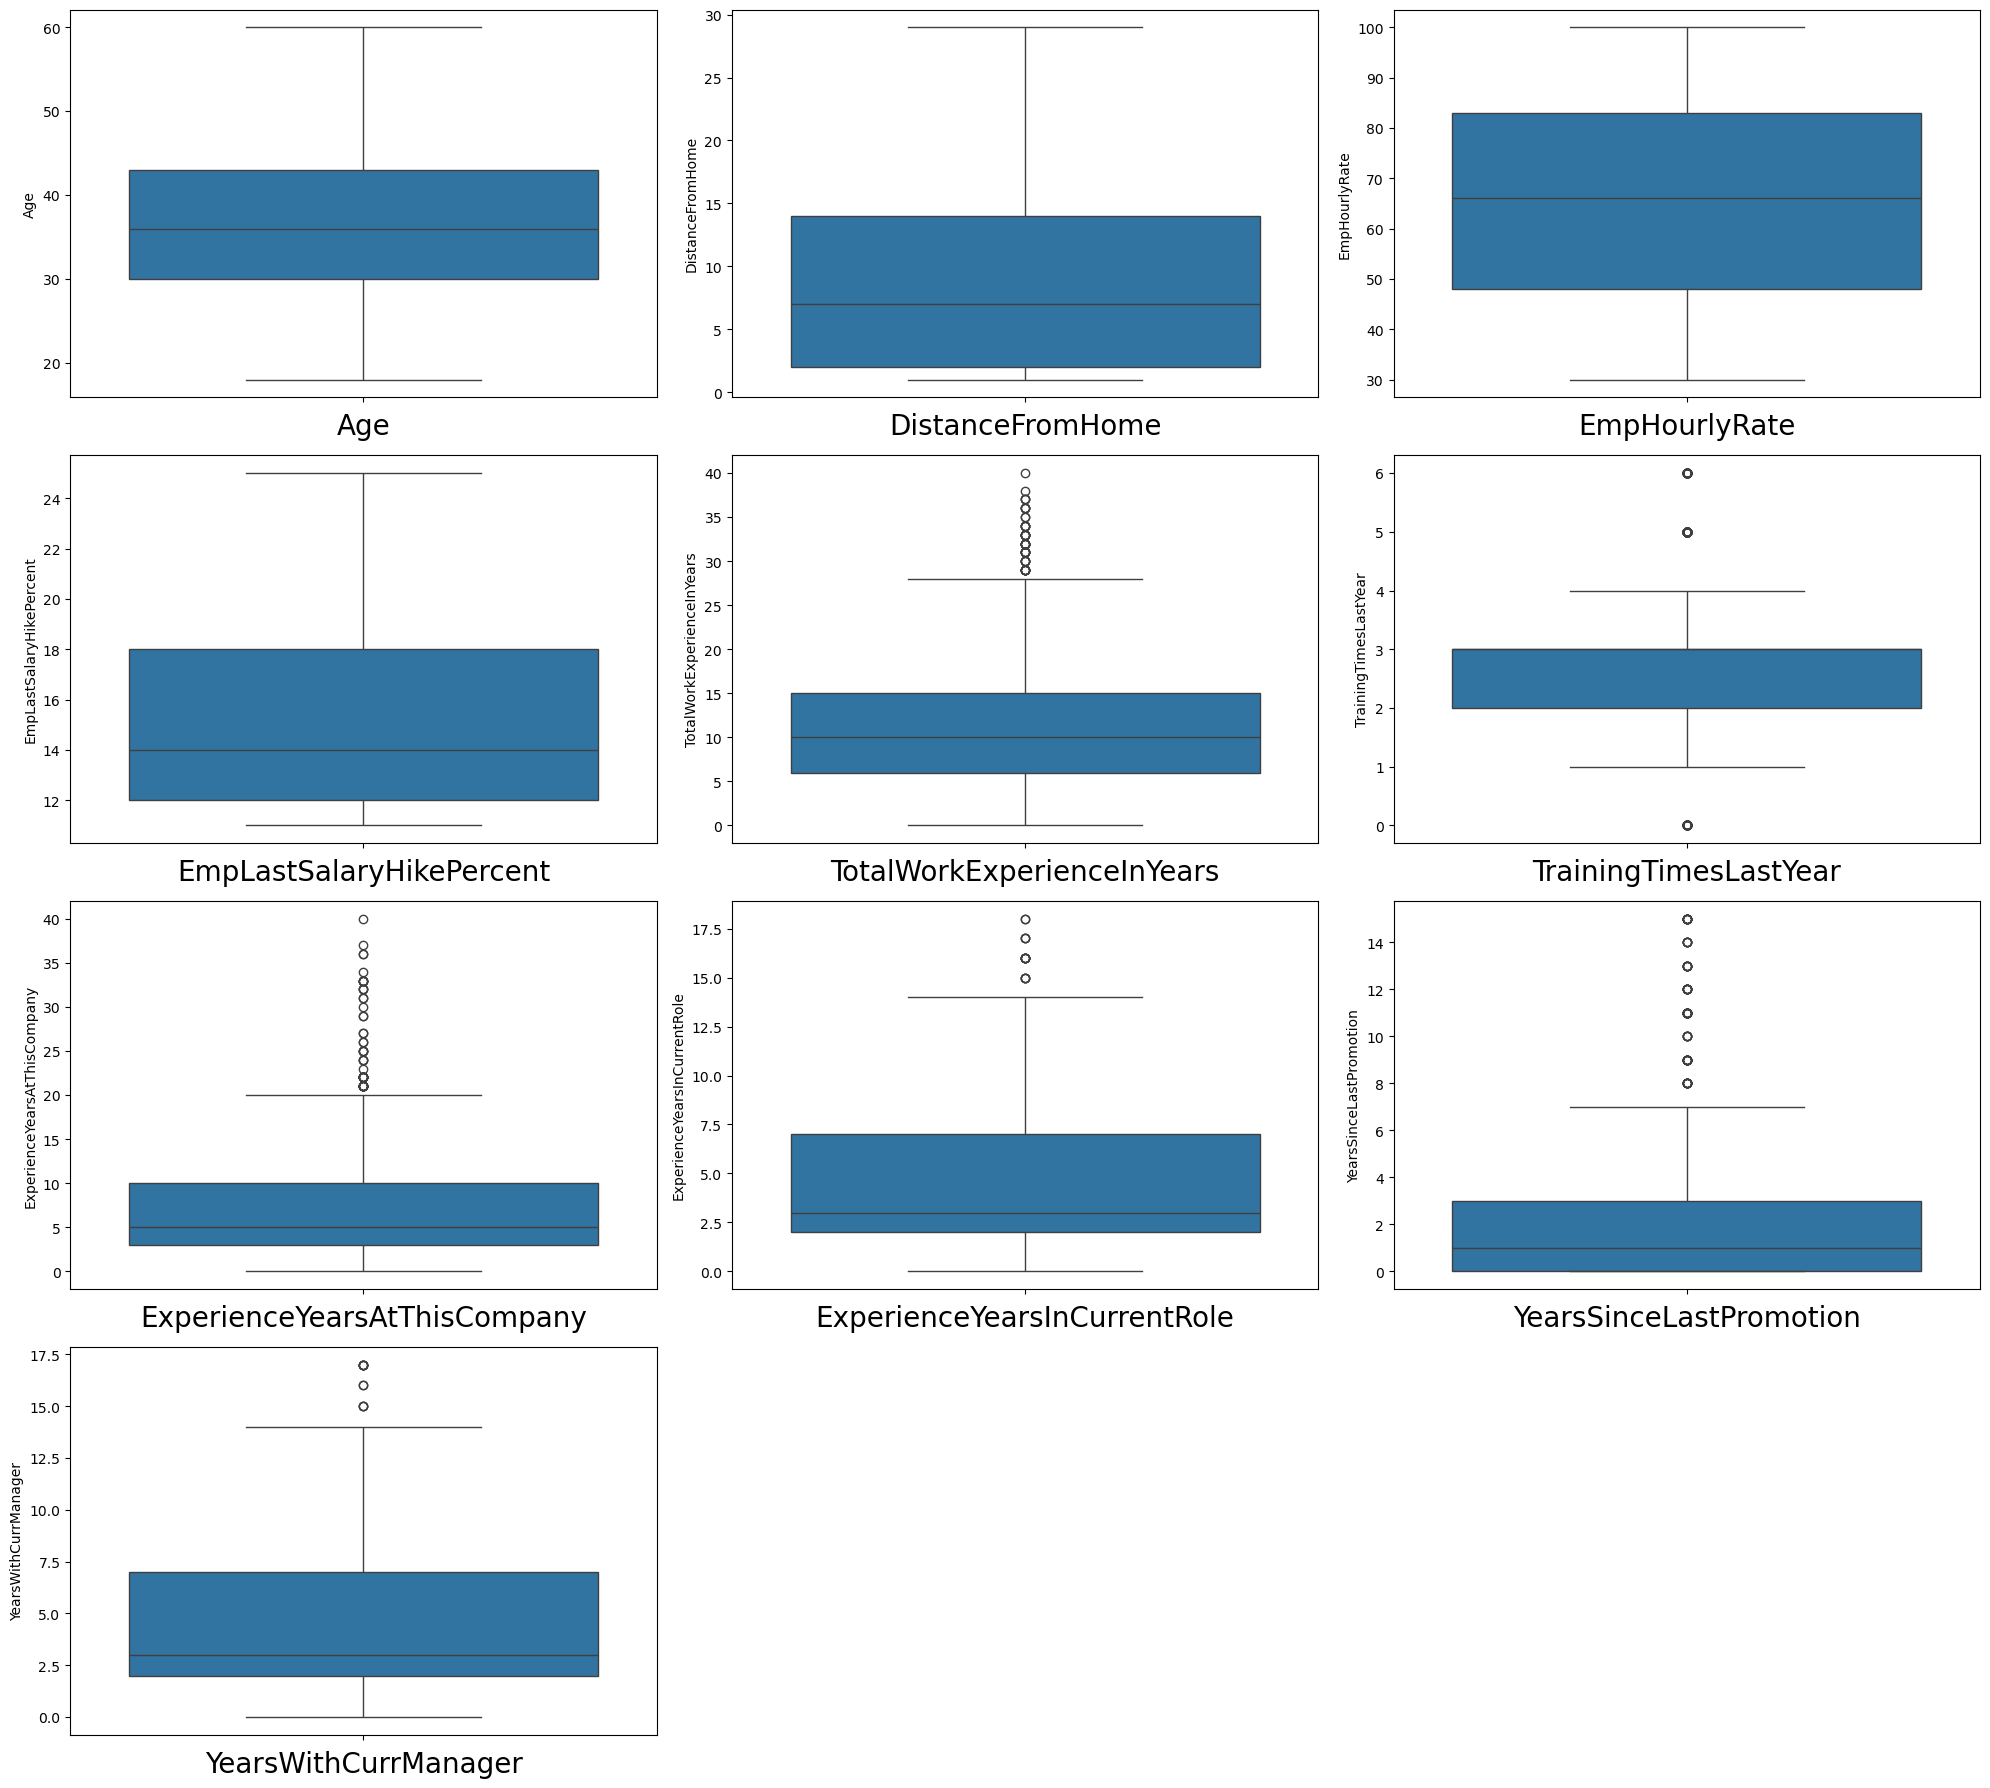

In [14]:
num_cols = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in num_cols: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(num_cols[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* We have outliers present in the data
* More amount of outliers present in the ExperienceYearsAtThisCompany, YearsSinceLastPromotion, TotalWorkExperienceInYears

### Imputing outliers

* Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.
  
**IQR (Inter Quartile Range):**

* IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

The columns need to be imputed for outliers are below

* TotalWorkExperienceInYears
* TrainingTimesLastYear
* ExperienceYearsAtThisCompany
* ExperienceYearsAtCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

#### TotalWorkExperienceInYears

In [15]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [16]:
# Impute outlier
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

# filtering data after imputation
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### TrainingTimesLastYear

In [17]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [18]:
# Impute outlier in max & minmum limit
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

# Filtering the min limit
df.loc[df['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [19]:
# Filtering the max limit
df.loc[df['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### ExperienceYearsAtThisCompany

In [20]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [21]:
# Impute outlier
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

# Filtering the data
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### ExperienceYearsAtCurrentRole

In [22]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [23]:
# Impute the outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = df['ExperienceYearsInCurrentRole'].median()

# Filtering the data
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### YearsSinceLastPromotion

In [24]:
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [25]:
# impute outlier
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

# Filtering data
df.loc[df['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### YearsWithCurrManager

In [26]:
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [27]:
# impute outlier
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

# Filtering the data
df.loc[df['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


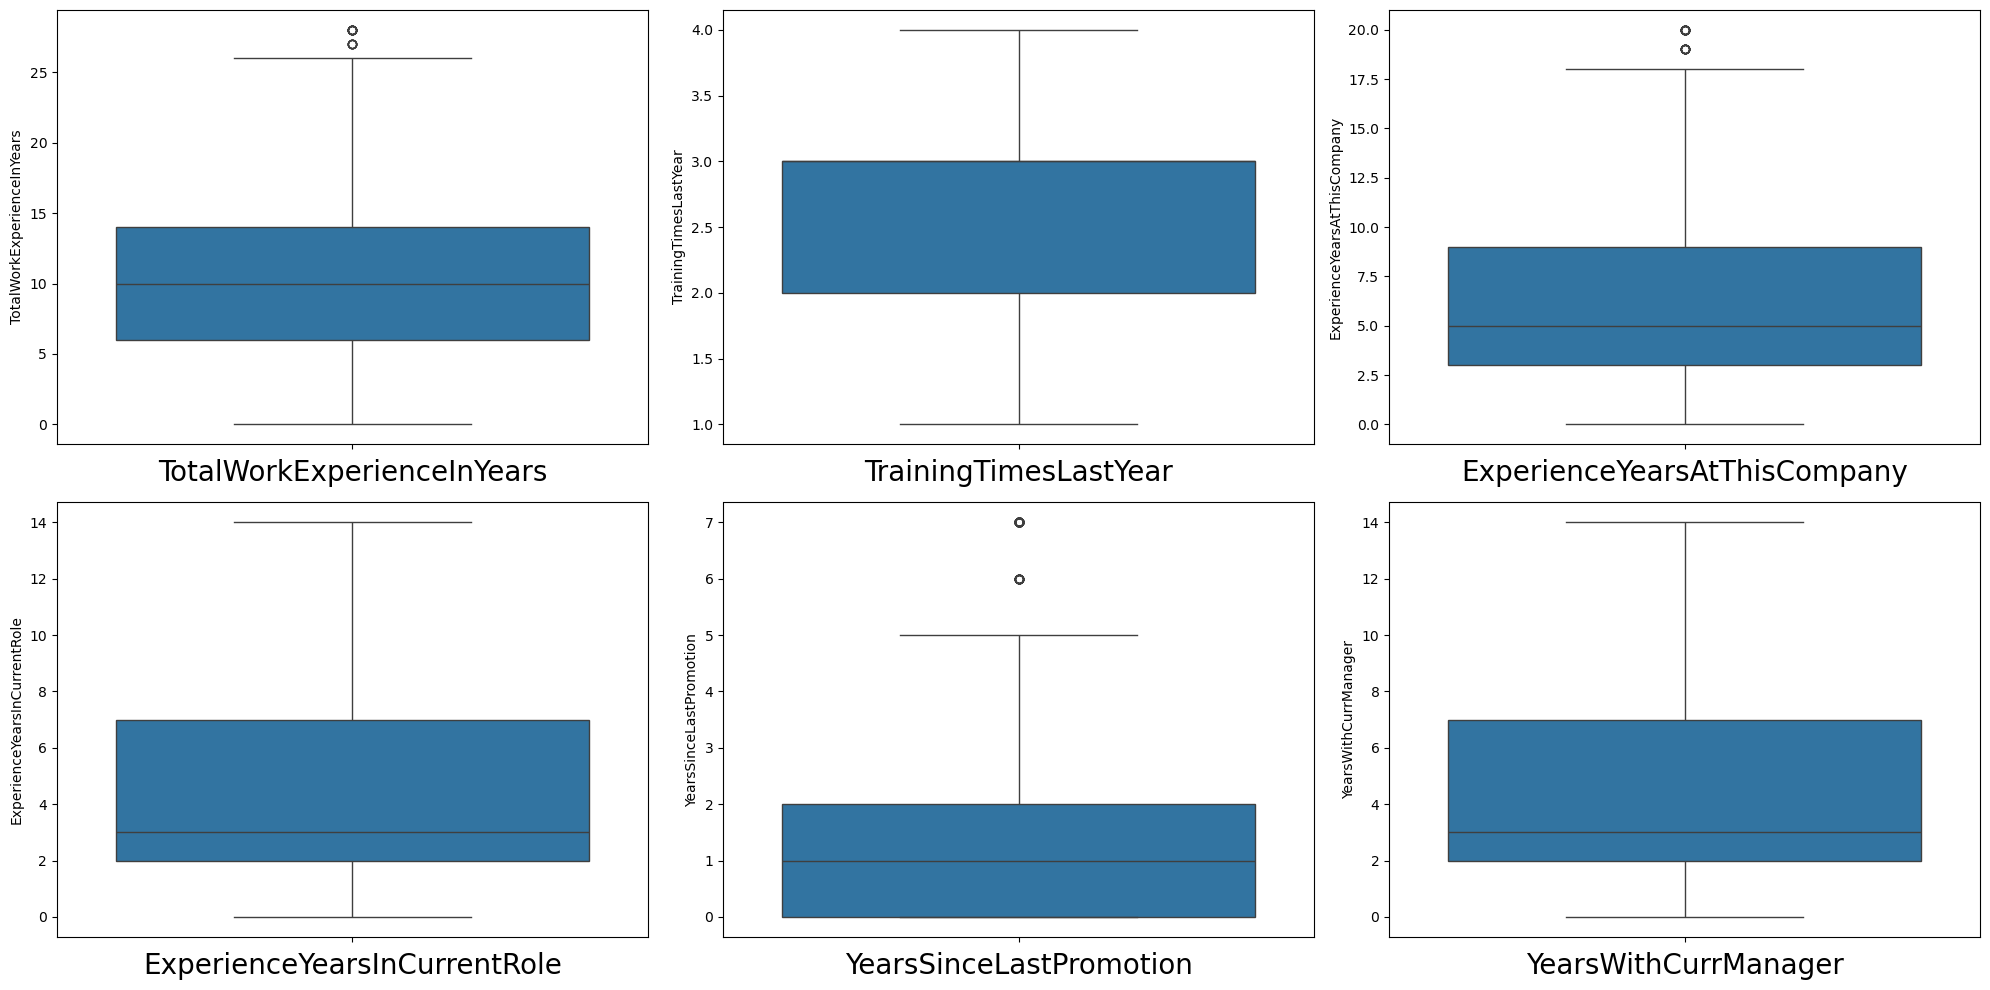

In [28]:
numcols_out = df[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in numcols_out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(numcols_out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

* We have imputed the outliers successfully, still we have some outliers, if we treat it, will result in loss of data.

### Feature Transformation

The YearSinceLastPromotion feature have skewed data when we check in the EDA part.

**Q-Q Plot:** 

Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

In [29]:
# define a function to plot a Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

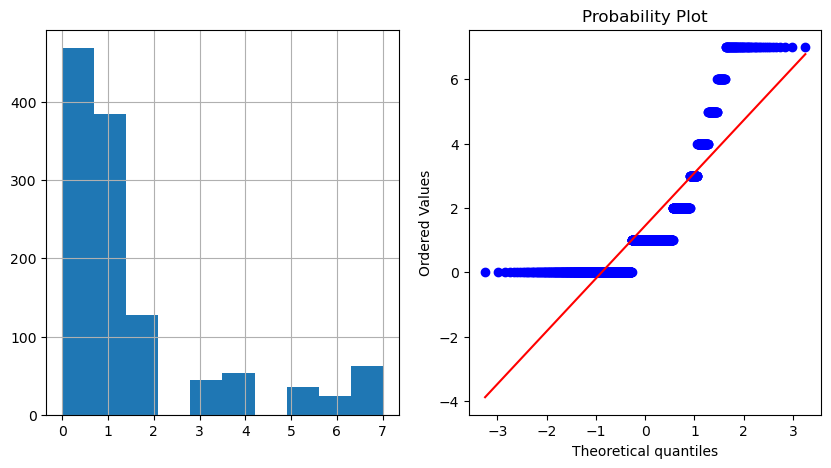

In [30]:
plot_data(df,'YearsSinceLastPromotion')

* The points on the Probability Plot (Q-Q plot) deviate significantly from the red reference line, indicating the data is not normally distributed.
* Since the data exhibits a strong positive (right) skew (as seen in the histogram), a square root transformation is a common technique to attempt to reduce the skew and bring the distribution closer to normal.

## Squareroot Transformation

In [31]:
df['square_YearsSinceLastPromotion'] = df.YearsSinceLastPromotion**(1/2)

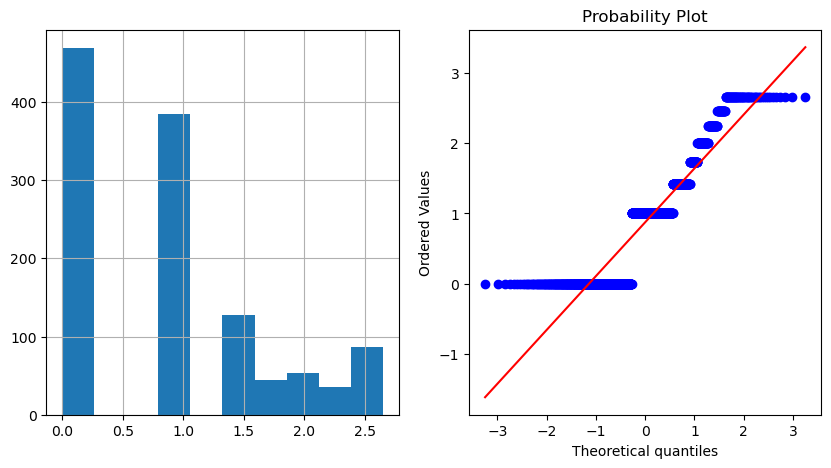

In [32]:
#plotting the data after the transformation
plot_data(df,'square_YearsSinceLastPromotion')

* After performing the square root transformation we can see that skewness reduced and distribution close to normal.

### Scaling the Data

**Standard Scaling:** Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [33]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Creating Object

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [34]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,0.102061,3,...,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,No,3,-1.057559
1,E1001006,1.109888,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,0.591464,4,...,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,No,3,0.151501
2,E1001007,0.339260,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,-0.509693,4,...,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,No,4,0.151501
3,E1001009,0.449349,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,0.102061,4,...,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,No,3,0.151501
4,E1001010,2.541054,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,0.836165,4,...,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,No,3,0.652311


### Encoding Categorical Columns

Technique used:

1.Mannual Encoding: Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

2.Frequency Encoding: Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

In [35]:
#Encoding the categorial columns into numerical columns

#getting the categorical columns
cat_columns = list(df.select_dtypes("O"))
print(cat_columns)

['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


In [36]:
df[cat_columns]

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...,...
1195,E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,E100995,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [37]:
#checking the value counts:

for cols in cat_columns:
    print(f"\n-------{cols}--------")
    print(df[cols].value_counts())


-------EmpNumber--------
EmpNumber
E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: count, Length: 1200, dtype: int64

-------Gender--------
Gender
Male      725
Female    475
Name: count, dtype: int64

-------EducationBackground--------
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

-------MaritalStatus--------
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

-------EmpDepartment--------
EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

-------EmpJobRole--------
EmpJobRole
Sales Executive              270
Developer            

**Columns to Manual Encoding:**

(Gender, MaritalStatus, BusinessTravelFrequency, OverTime, Attrition)

**Columns to Perform Frequency encoding:**

(EducationBackground, EmpDepartment, EmpJobRole)

### Manual Encoding

In [38]:
df.Gender = df.Gender.map({'Male':1, 'Female':2})
df.MaritalStatus = df.MaritalStatus.map({'Married':2, 'Single':1, 'Divorced':0})
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
df.OverTime = df.OverTime.map({'No':0, 'Yes':1})
df.Attrition = df.Attrition.map({'No':0, 'Yes':1})

### Frequency Encoding

In [39]:
#EducationBackground

df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [40]:
#EmpDepartment
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

In [41]:
#EmpJobRole
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [42]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,1,0.102061,3,...,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,0,3,-1.057559
1,E1001006,1.109888,1,3,1,5,18,1,0.591464,4,...,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,0,3,0.151501
2,E1001007,0.339260,1,5,2,5,18,2,-0.509693,4,...,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,0,4,0.151501
3,E1001009,0.449349,1,0,0,2,11,1,0.102061,4,...,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,0,3,0.151501
4,E1001010,2.541054,1,3,1,5,18,1,0.836165,4,...,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,0,3,0.652311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,-1.091906,2,4,0,5,18,2,-0.754394,1,...,-0.687097,0.544841,3,-0.022263,0.264897,0,0.004988,0,4,-1.057559
1196,E100993,0.008991,1,5,1,4,12,1,0.102061,2,...,-1.001378,-0.879579,3,-1.135438,-1.233106,0,-1.192127,0,3,-1.057559
1197,E100994,1.440157,1,4,2,4,12,1,2.304373,1,...,1.512870,0.544841,3,3.094625,1.163699,3,1.202103,0,3,1.036595
1198,E100995,-0.321278,2,4,1,0,5,1,-0.020290,3,...,-0.215675,0.544841,4,0.423006,0.864098,7,0.902825,0,3,2.141314


### Feature Selection:

In [43]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

In [44]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,-0.541458,1,3,1,5,18,1,0.102061,3,4,...,4,-0.058535,-0.879579,2,0.868276,0.864098,1.202103,0,3,-1.057559
1,1.109888,1,3,1,5,18,1,0.591464,4,4,...,4,1.512870,-0.879579,3,0.200371,0.864098,0.902825,0,3,0.151501
2,0.339260,1,5,2,5,18,2,-0.509693,4,4,...,3,1.512870,-0.879579,3,2.649355,2.661702,2.399219,0,4,0.151501
3,0.449349,1,0,0,2,11,1,0.102061,4,2,...,2,1.984292,-0.879579,2,-0.244898,0.564498,0.603546,0,3,0.151501
4,2.541054,1,3,1,5,18,1,0.836165,4,1,...,4,-0.058535,-2.303999,3,-0.912803,-0.633905,-0.593570,0,3,0.652311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,2,4,0,5,18,2,-0.754394,1,4,...,2,-0.687097,0.544841,3,-0.022263,0.264897,0.004988,0,4,-1.057559
1196,0.008991,1,5,1,4,12,1,0.102061,2,4,...,1,-1.001378,-0.879579,3,-1.135438,-1.233106,-1.192127,0,3,-1.057559
1197,1.440157,1,4,2,4,12,1,2.304373,1,4,...,3,1.512870,0.544841,3,3.094625,1.163699,1.202103,0,3,1.036595
1198,-0.321278,2,4,1,0,5,1,-0.020290,3,4,...,2,-0.215675,0.544841,4,0.423006,0.864098,0.902825,0,3,2.141314


### Correlation Check

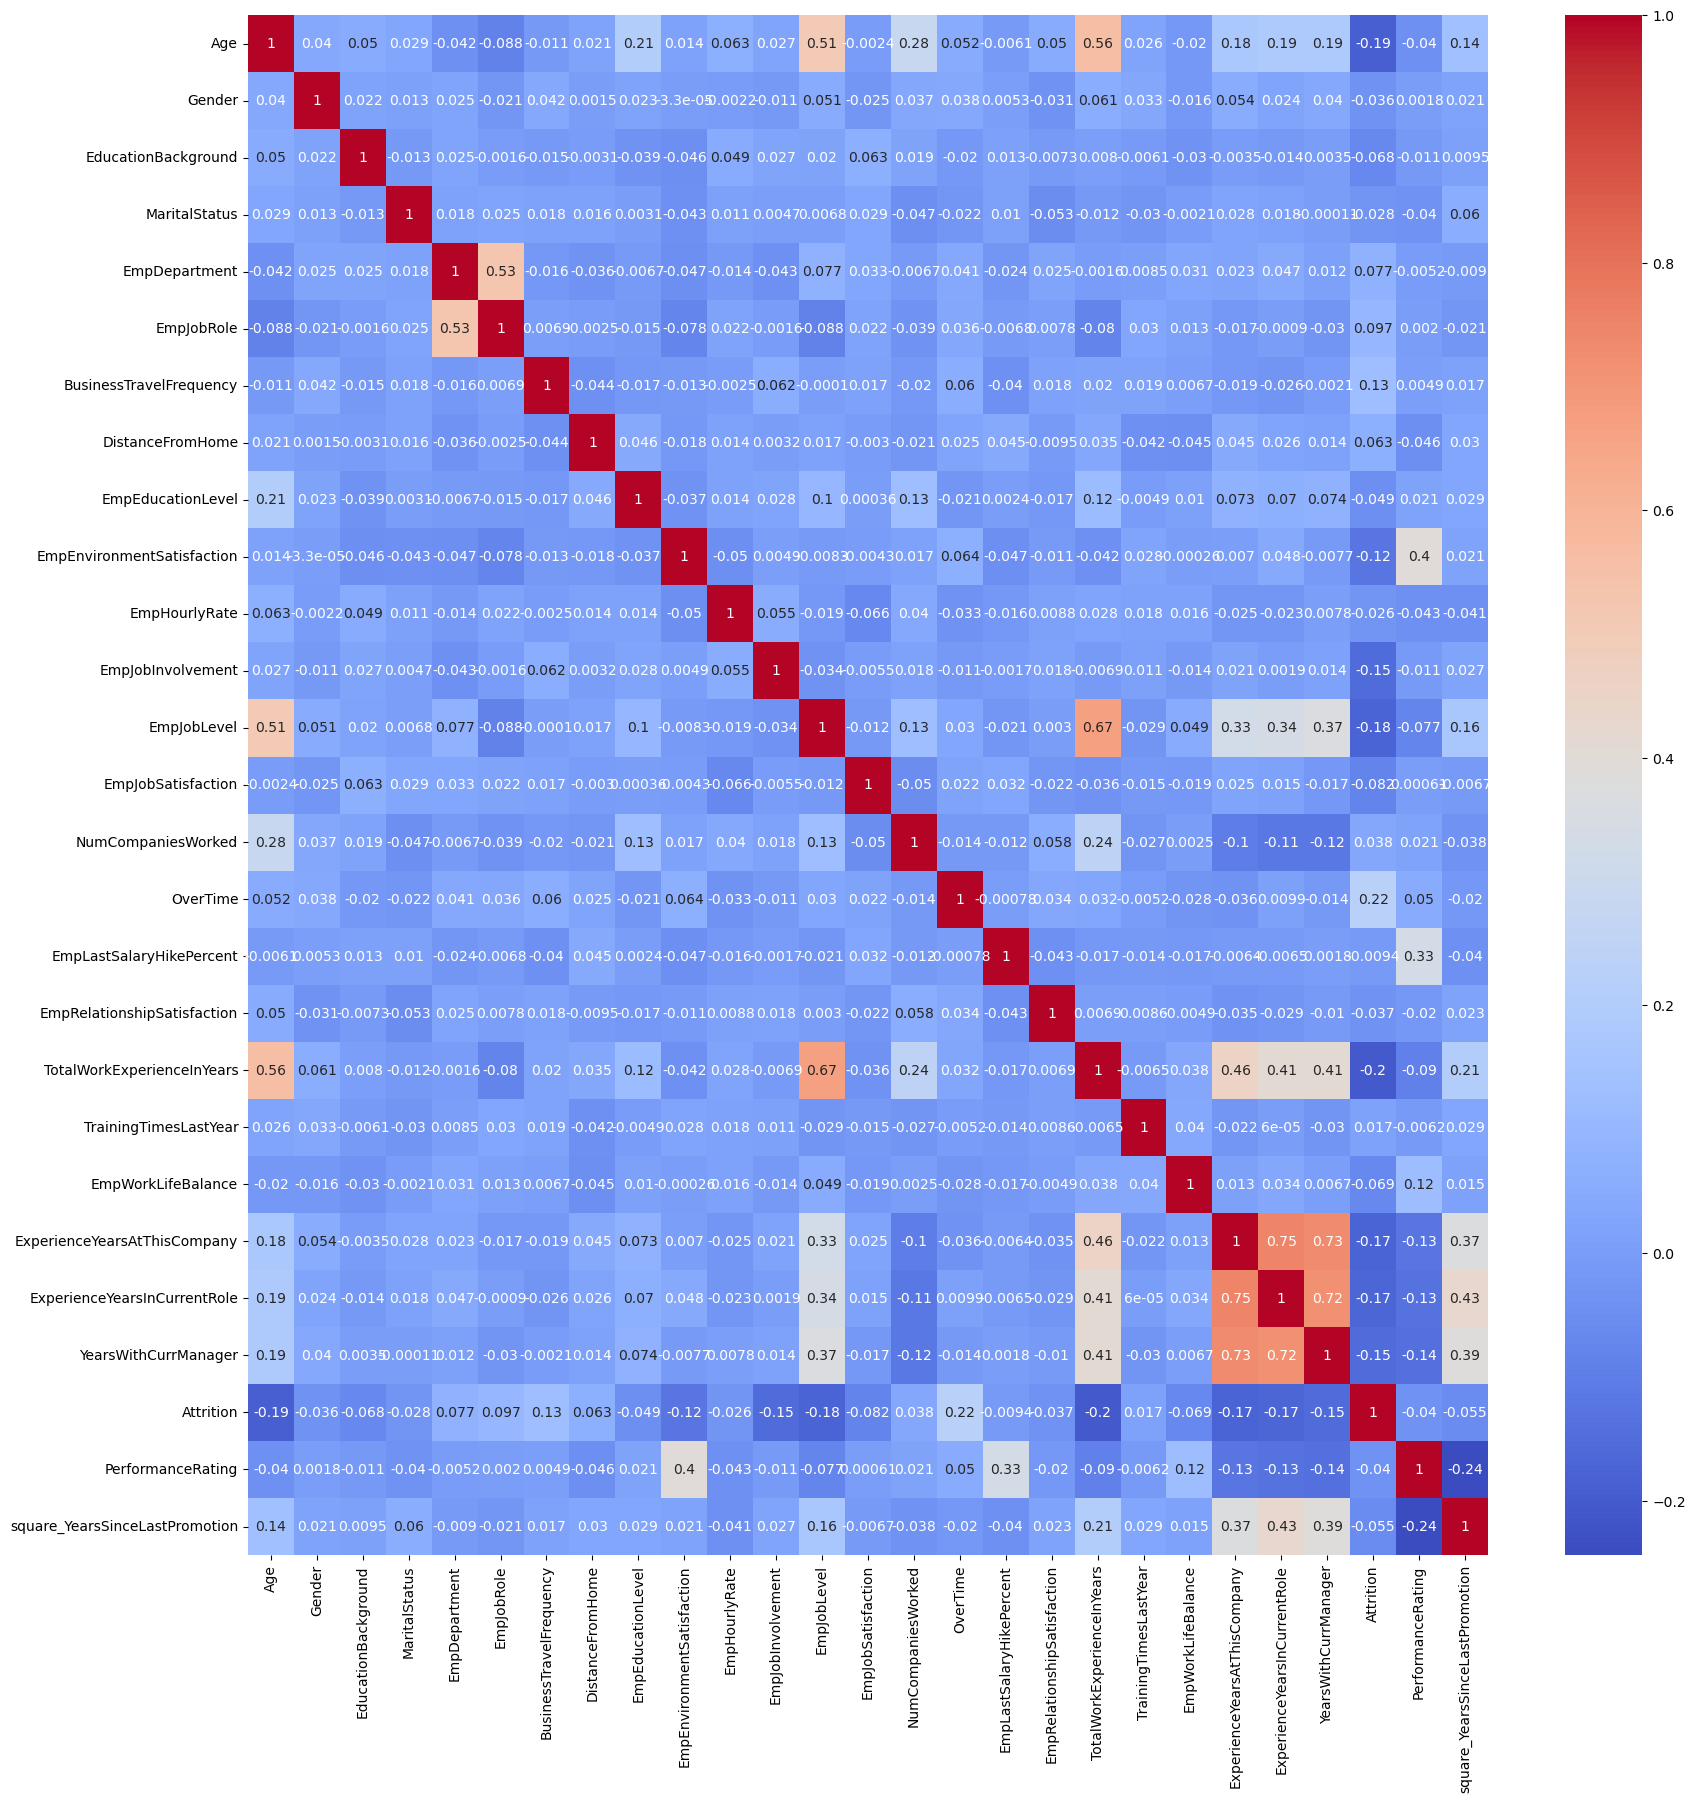

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [46]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corr = df.corr()
corr = corr.abs().unstack()
corr = corr.sort_values(ascending=False)
corr = corr [corr >= 0.9] # Set threshold 0.9
corr = corr [corr < 1]
corr = pd.DataFrame(corr).reset_index()
corr.columns = ['feature1','feature2','corr']
corr

,feature1,feature2,corr


**Insights**
* From the above heatmap and code to detect the highly correlated columns, we can see that no column is highly correlated

### PRINCIPLE COMPONENT ANALYSIS


**Principal component analysis (PCA)** is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

* To mitigate overfitting and enhance model performance, we will use a dimensionality reduction technique, such as Principal Component Analysis (PCA), on the dataset's 25+ features to reduce noise and extract a smaller set of uncorrelated, highly informative features."

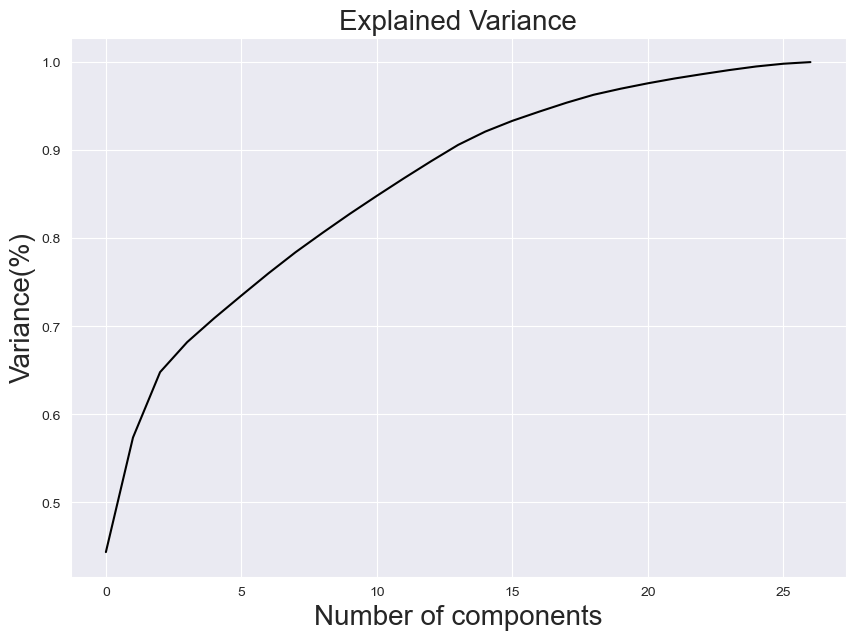

In [47]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [48]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(df)
new_data

array([[ 4.48129431, -1.62850137,  1.04795573, ..., -0.41315663,
         0.144702  , -0.34966224],
       [ 4.35760774, -0.07109821,  2.015938  , ..., -0.86281972,
        -0.31211178, -0.64358146],
       [ 4.24164228,  2.56175356,  4.36205707, ..., -0.59487011,
         0.23231473,  0.42915609],
       ...,
       [-1.64097111, -1.73575479,  3.13562868, ..., -0.0884966 ,
         0.44210679,  1.10077948],
       [-9.1044938 , -2.10112551,  1.48294319, ...,  0.64895589,
        -0.16564221, -0.25010615],
       [ 4.36587589,  5.97940058, -2.10131195, ...,  0.64844483,
        -0.08147221, -0.01090657]])

In [49]:
#Creating a new dataframe with the PCA values

processed_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
processed_df['PerformanceRating']=df.PerformanceRating

processed_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.481294,-1.628501,1.047956,-0.933500,0.925134,1.029647,0.835034,1.463693,0.549426,-0.524361,...,-0.791007,-0.093407,-0.344439,-0.184039,-0.101912,-0.277742,-0.413157,0.144702,-0.349662,3
1,4.357608,-0.071098,2.015938,-1.513005,-0.396063,-0.576457,1.712992,-0.075228,0.975862,-0.890574,...,-0.492291,0.316399,0.964538,0.525252,-0.086952,-0.368111,-0.862820,-0.312112,-0.643581,3
2,4.241642,2.561754,4.362057,0.172691,1.748291,-0.363683,0.437324,-1.341480,0.328197,-1.879120,...,0.492510,-0.436926,0.206294,0.470151,0.949025,0.624923,-0.594870,0.232315,0.429156,4
3,-3.012253,0.723361,2.326396,-3.284738,-2.312531,1.905064,-1.074595,0.247842,-0.093157,0.178636,...,0.555283,-0.719977,-1.535159,-0.134353,-0.272576,0.083561,-0.541444,-0.118246,-0.469829,3
4,4.248157,5.963902,-0.246539,-0.786352,-2.094958,-1.716061,-0.746786,0.500047,0.791468,-1.199249,...,-0.630371,0.189137,1.546812,-0.740817,-0.017727,0.062501,-0.123671,0.434470,-0.215044,3


### Saving and Processing the data

In [50]:
# 1. Save the processed DataFrame
processed_df.to_csv('final_data_for_model.csv', index=False)
print("Data saved successfully as INX_EMPLOYEE_PERFORMANCE_ANALYSIS_PROCESSED_DATA.csv")

# 2. exporting the processed data
file_path = r"C:\Users\subas\Downloads\INX_EMPLOYEE_PERFORMANCE_ANAYSIS\Data\Processed\INX_EMPLOYEE_PERFORMANCE_ANALYSIS_PROCESSED_DATA.csv"
processed_df.to_csv(file_path, index=False)

Data saved successfully as INX_EMPLOYEE_PERFORMANCE_ANALYSIS_PROCESSED_DATA.csv
